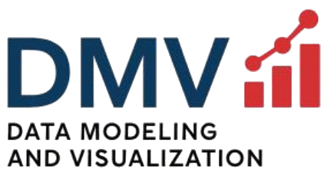

# **Week 5: Ridgeline Plots, Pie Charts and Treemaps**

We will the famous 'Titanic dataset' for this session.

In [55]:
try: # Import the package if already installed
    import matplotlib.pyplot as plt
except: # Otherwise install the package first and then import
    !pip install matplotlib
    import matplotlib.pyplot as plt
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
try:
    import plotnine as p9
except:
    !pip install plotnine
    import plotnine as p9

# For using files stored in Google Drive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# Now include the file path
folder_path = 'drive/MyDrive/DA209_DMV/'
#file_name = 'titanic.csv' #Change the file name as per the requirements

#Let's load the dataset directly from seaborn library itself
titanic = sns.load_dataset('titanic')
titanic.head()

Mounted at /content/drive


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Additional Libraries needed for Ridgeline and Treemaps**

In [56]:
!pip install joypy
!pip install squarify
import joypy  # For Ridgeline plots
import squarify # For Treemaps
from matplotlib import cm

## **Data preprocessing**

In [57]:
# Prepare data: Drop NA ages for cleaner visualization
titanic.dropna(subset=['age', 'sex', 'class'], inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **1. Ridgeline Plots**

Ridgeline plots (also called joyplots) visualize the distribution of a numerical variable (age) across several categories (passenger classes). Ridgeline plots are fantastic for visualizing distributions across multiple categories, especially when you want to compare their shapes and overlaps. Each class is layered along the vertical axis with its respective KDE curve, allowing clear comparison of age distributions.

**Example 1: Age Distribution by Survival Status**

Let's compare the age distributions of passengers who **survived** versus those who **did not survive**. This can reveal if age played a role in survival rates.

<Figure size 1000x400 with 0 Axes>

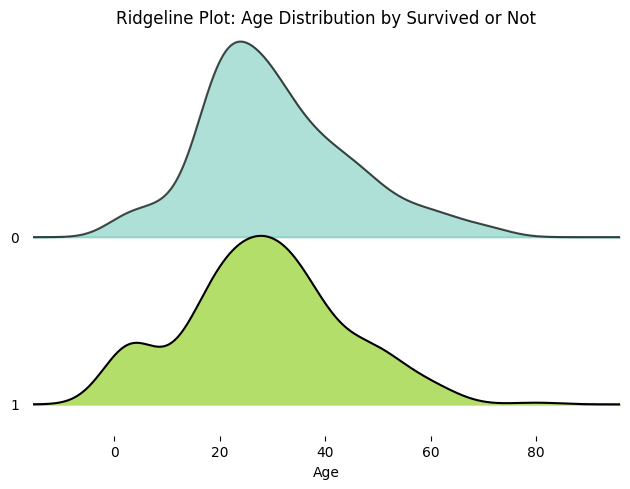

In [58]:
plt.figure(figsize=(10, 4))
joypy.joyplot(data=titanic, column='age', by='survived',
              colormap=cm.Set3, fade=True,
              title='Ridgeline Plot: Age Distribution by Survived or Not')
plt.xlabel('Age')
plt.show()


**Example 2: Age Distribution by Class**

Let's compare the **age distributions** of passengers based on the **Class** of ticket bought.

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


<Figure size 1000x400 with 0 Axes>

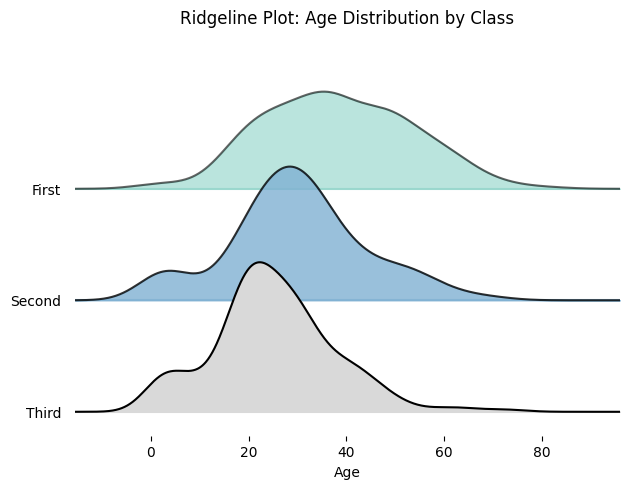

In [59]:
plt.figure(figsize=(10, 4))
joypy.joyplot(data=titanic, column='age', by='class',
              colormap=cm.Set3, fade=True,
              title='Ridgeline Plot: Age Distribution by Class')
plt.xlabel('Age')
plt.show()


**Stacked Density Plot: Age Distribution by Class**

A stacked density plot overlays the kernel density curves for age, grouped by class. While useful for seeing overlaps, this format can obscure finer differences, especially for smaller groups.

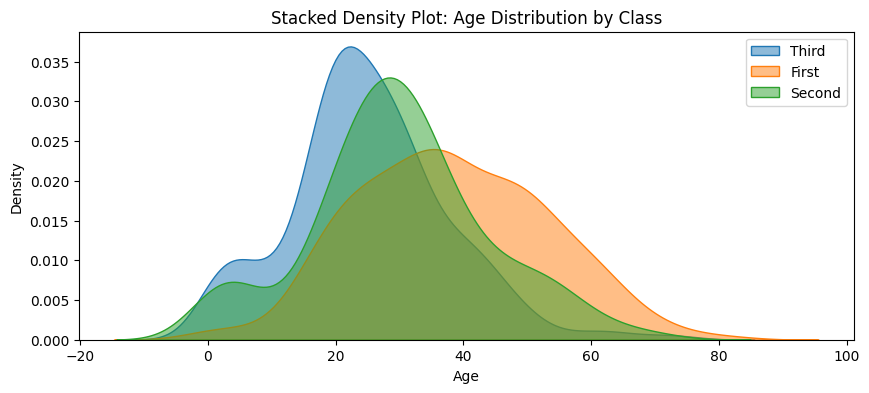

In [60]:
plt.figure(figsize=(10,4))
classes = titanic['class'].unique()
for cls in classes:
    sns.kdeplot(titanic[titanic['class'] == cls]['age'],
                label=cls, fill=True, alpha=0.5)
plt.title('Stacked Density Plot: Age Distribution by Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


## **Comparison: Ridgeline vs. Stacked Density**

1. Ridgeline Plots clearly separate each group’s distribution, allowing easier shape comparison.

2. Stacked Density Plots, while compact, can obscure smaller groups due to stacking.

3. Overall, ridgelines are better suited for multi-group distribution comparison where details matter.

## **Ridgeline Plot: Age Distribution by Gender with KDE Curves**

This variation of the ridgeline plot uses KDE curves to illustrate age distribution separately for male and female passengers. Linewidth and color gradients are added for visual enhancement. This form is useful for comparing symmetrical versus skewed distributions across gender.

<Figure size 1000x400 with 0 Axes>

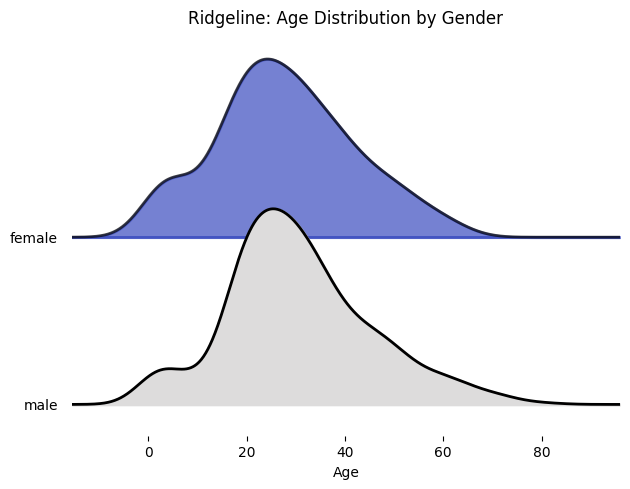

In [61]:
plt.figure(figsize=(10, 4))
joypy.joyplot(data=titanic, column='age', by='sex',
              fade=True, linewidth=2, kind='kde',
              colormap=cm.coolwarm,
              title='Ridgeline: Age Distribution by Gender')
plt.xlabel('Age')
plt.show()


# **2. Basic Pie Chart: Gender Distribution**

A simple pie chart visualizing the distribution of male and female passengers. Each slice size reflects the proportion of each gender.

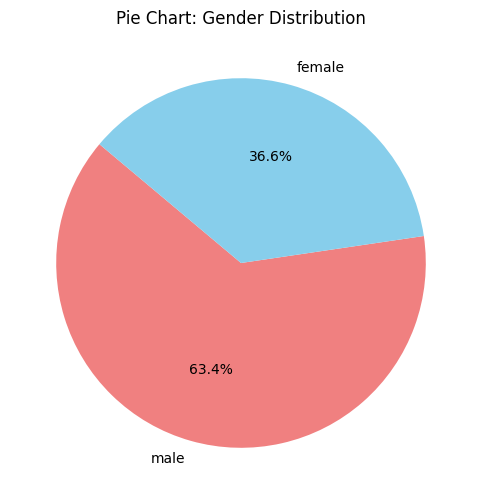

In [62]:
gender_counts = titanic['sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index,
        autopct='%1.1f%%', startangle=140,
        colors=['lightcoral', 'skyblue'])
plt.title('Pie Chart: Gender Distribution')
plt.show()


## **Exploded Pie Chart**

What if we focus on one part more than other(s).

This pie chart shows the distribution of passengers across their gender with an exploded effect that pulls slices apart. This effect enhances visibility and emphasis, particularly useful in presentations.

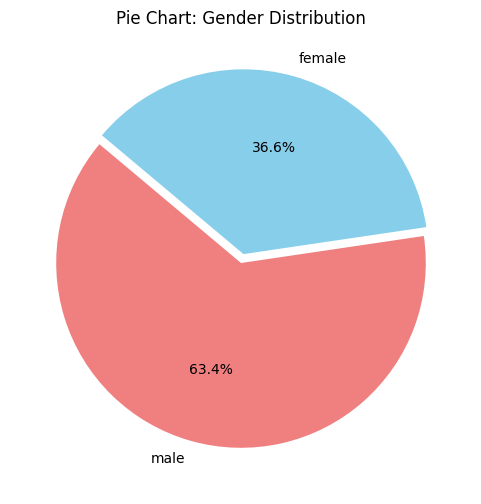

In [63]:
gender_counts = titanic['sex'].value_counts()
explode = [0,0.05]
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index,
        autopct='%1.1f%%', startangle=140,explode=explode,
        colors=['lightcoral', 'skyblue'])
plt.title('Pie Chart: Gender Distribution')
plt.show()


## **Let's focus on First Class passengers**

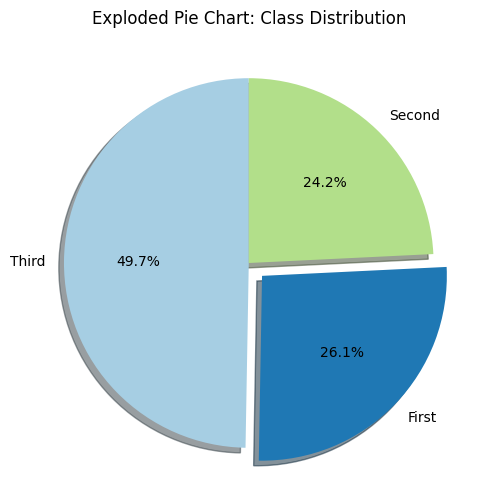

In [65]:
class_counts = titanic['class'].value_counts()
explode = [0, 0.1, 0]
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index,
        autopct='%1.1f%%', explode=explode,
        startangle=90, shadow=True,
        colors=cm.Paired.colors)
plt.title('Exploded Pie Chart: Class Distribution')
plt.show()


## **Can we focus on more than one class?**

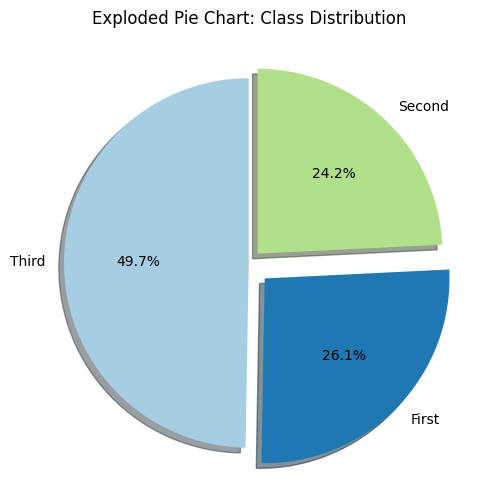

In [66]:
class_counts = titanic['class'].value_counts()
explode = [0, 0.12, 0.07]
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index,
        autopct='%1.1f%%', explode=explode,
        startangle=90, shadow=True,
        colors=cm.Paired.colors)
plt.title('Exploded Pie Chart: Class Distribution')
plt.show()

# **3. Donut Plot**

A donut chart is a variation of a pie chart with a central hole. While it conveys the same information as a pie chart, it leaves space in the center for additional annotations or titles.

Useful for stylized reporting or dashboards.

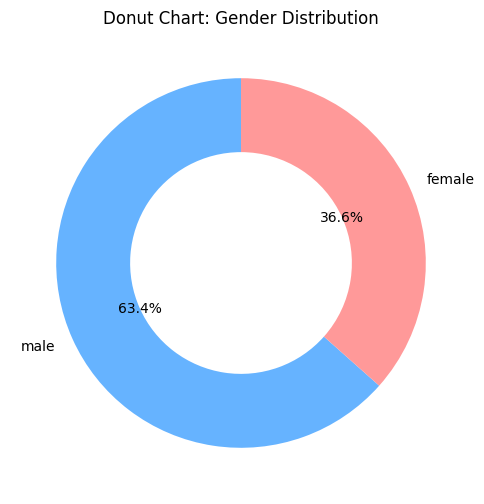

In [46]:
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index,
        autopct='%1.1f%%', startangle=90,
        wedgeprops={'width':0.4}, colors=['#66b3ff', '#ff9999'])
plt.title('Donut Chart: Gender Distribution')
plt.show()


# **4. Treemaps**
A treemap displays hierarchical categorical data using nested rectangles. Each rectangle size is proportional to the survival count in a (class, gender) group.

This allows quick comparison of survival volumes across combinations. The label inside each box helps interpret the grouping and count.

<ipython-input-67-3946104465>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


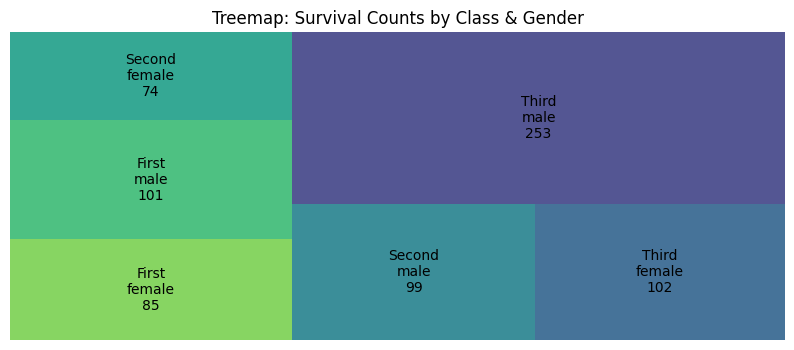

In [67]:
import squarify
from matplotlib import cm

# Group data and fix type conversion
treemap_data = titanic.groupby(['class', 'sex'])['survived'].count().reset_index()
treemap_data['label'] = treemap_data['class'].astype(str) + '\n' + treemap_data['sex'].astype(str) + '\n' + treemap_data['survived'].astype(str)

# Plot treemap
plt.figure(figsize=(10, 4))
squarify.plot(sizes=treemap_data['survived'],
              label=treemap_data['label'],
              color=cm.viridis_r(np.linspace(0.2, 0.8, len(treemap_data))),
              alpha=0.9)
plt.title('Treemap: Survival Counts by Class & Gender')
plt.axis('off')
plt.show()


*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*